In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
from src.image_util import remake_image, open_rgb, open_rgba, similarity_feature

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

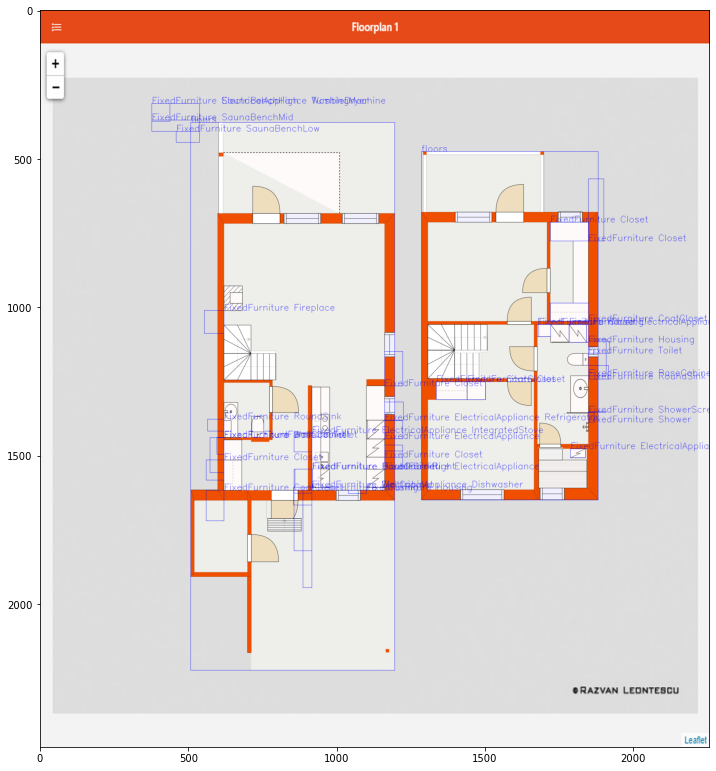

In [10]:
! python src\generator.py -i . -o .

im = open_rgb('saved.png')
plt.figure(figsize=(12, 16))
plt.imshow(im)
plt.show()

In [11]:
plt.imshow(img)

NameError: name 'img' is not defined

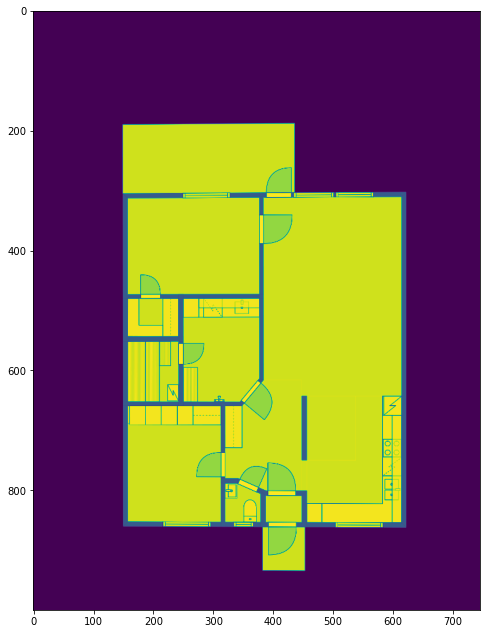

In [22]:
im = similarity_feature(img, nimg)

plt.figure(figsize = (8,12))
plt.imshow(im)
plt.show()